In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [ ]:


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression




In [ ]:
# import pandas as pd

# # Sample DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [1, 2, 4], 'Age': [25, 30, 22]})

# Merge based on the 'ID' column
merged_df = pd.merge(df1, df2, on='ID', how='inner')

# Display the merged DataFrame
print(merged_df)


   ID   Name  Age
0   1  Alice   25
1   2    Bob   30


In [ ]:
# test_df

##Loading the dataset

In [ ]:
# test_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv', engine='python', on_bad_lines='skip')
df = pd.read_csv('/content/drive/MyDrive/practicum/train.csv', engine='python', on_bad_lines='skip')

##Merging Dataframes

In [ ]:
# df = pd.merge(test_df, train_df, on='ID')

In [ ]:
df.head(10)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   
5   6  On maximizing the fundamental frequency of the...   
6   7  On the rotation period and shape of the hyperb...   
7   8  Adverse effects of polymer coating on heat tra...   
8   9  SPH calculations of Mars-scale collisions: the...   
9  10  $\mathcal{R}_{0}$ fails to predict the outbrea...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   
5    Let $\Omega \subset \mathbb{R}^n$ be a bound...                 0   
6    We observed the newly discovered hyperbolic ...                 0   
7    The ability of metallic nanoparticles to sup...                 0   
8    We model large-scale ($\approx$2000km) impac...                 0   
9    Time varying susceptibility of host at indiv...                 0   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   
5        0            1           0                     0   
6        1            0           0                     0   
7        1            0           0                     0   
8        1            0           0                     0   
9        0            0           0                     1   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

##Exploratory Data Analysis

In [ ]:
df['Computer Science'].value_counts()

0    12378
1     8594
Name: Computer Science, dtype: int64

##Printing Info about dataframe

In [ ]:
df.info

<bound method DataFrame.info of           ID                                              TITLE  \
0          1        Reconstructing Subject-Specific Effect Maps   
1          2                 Rotation Invariance Neural Network   
2          3  Spherical polyharmonics and Poisson kernels fo...   
3          4  A finite element approximation for the stochas...   
4          5  Comparative study of Discrete Wavelet Transfor...   
...      ...                                                ...   
20967  20968  Contemporary machine learning: a guide for pra...   
20968  20969  Uniform diamond coatings on WC-Co hard alloy c...   
20969  20970  Analysing Soccer Games with Clustering and Con...   
20970  20971  On the Efficient Simulation of the Left-Tail o...   
20971  20972   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Computer Science  \
0        Predictive models allow subject-specific inf...                 1   
1      

##Number of sample points and columns

In [ ]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
printmd("**Sample data:**")
df.head()

Number of rows in data = 20972
Number of columns in data = 9




**Sample data:**

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

##Checking Missing Values

In [ ]:
#checking missing_values
missing_values_check = df.isnull().sum()
print(missing_values_check)

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64


In [ ]:
df.iloc[:,2:].sum(axis=1)

<ipython-input-11-6a38acb1dab8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,2:].sum(axis=1)


0        1
1        1
2        1
3        1
4        2
        ..
20967    2
20968    1
20969    1
20970    2
20971    2
Length: 20972, dtype: int64

##Number of articles not belonging to a certain category

In [ ]:

rowSums = df.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of articles = ",len(df))
print("Number of articles without a label = ",clean_comments_count)
print("Number of articles with labels =",(len(df)-clean_comments_count))

Total number of articles =  20972
Number of articles without a label =  0
Number of articles with labels = 20972


<ipython-input-5-5d17f7e56c16>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowSums = df.iloc[:,2:].sum(axis=1)


In [ ]:
article_categories = list(df.columns.values)
categories = article_categories[3:]
print(categories)

['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']


##Calculating number of topics of articles in each category

In [ ]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['article type', '--number of articles'])
df_stats

article type  --number of articles
0      Computer Science                  8594
1               Physics                  6013
2           Mathematics                  5618
3            Statistics                  5206
4  Quantitative Biology                   587
5  Quantitative Finance                   249

In [ ]:
categories = list(df.iloc[:,3:].columns.values)
categories

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

##Comments in each category

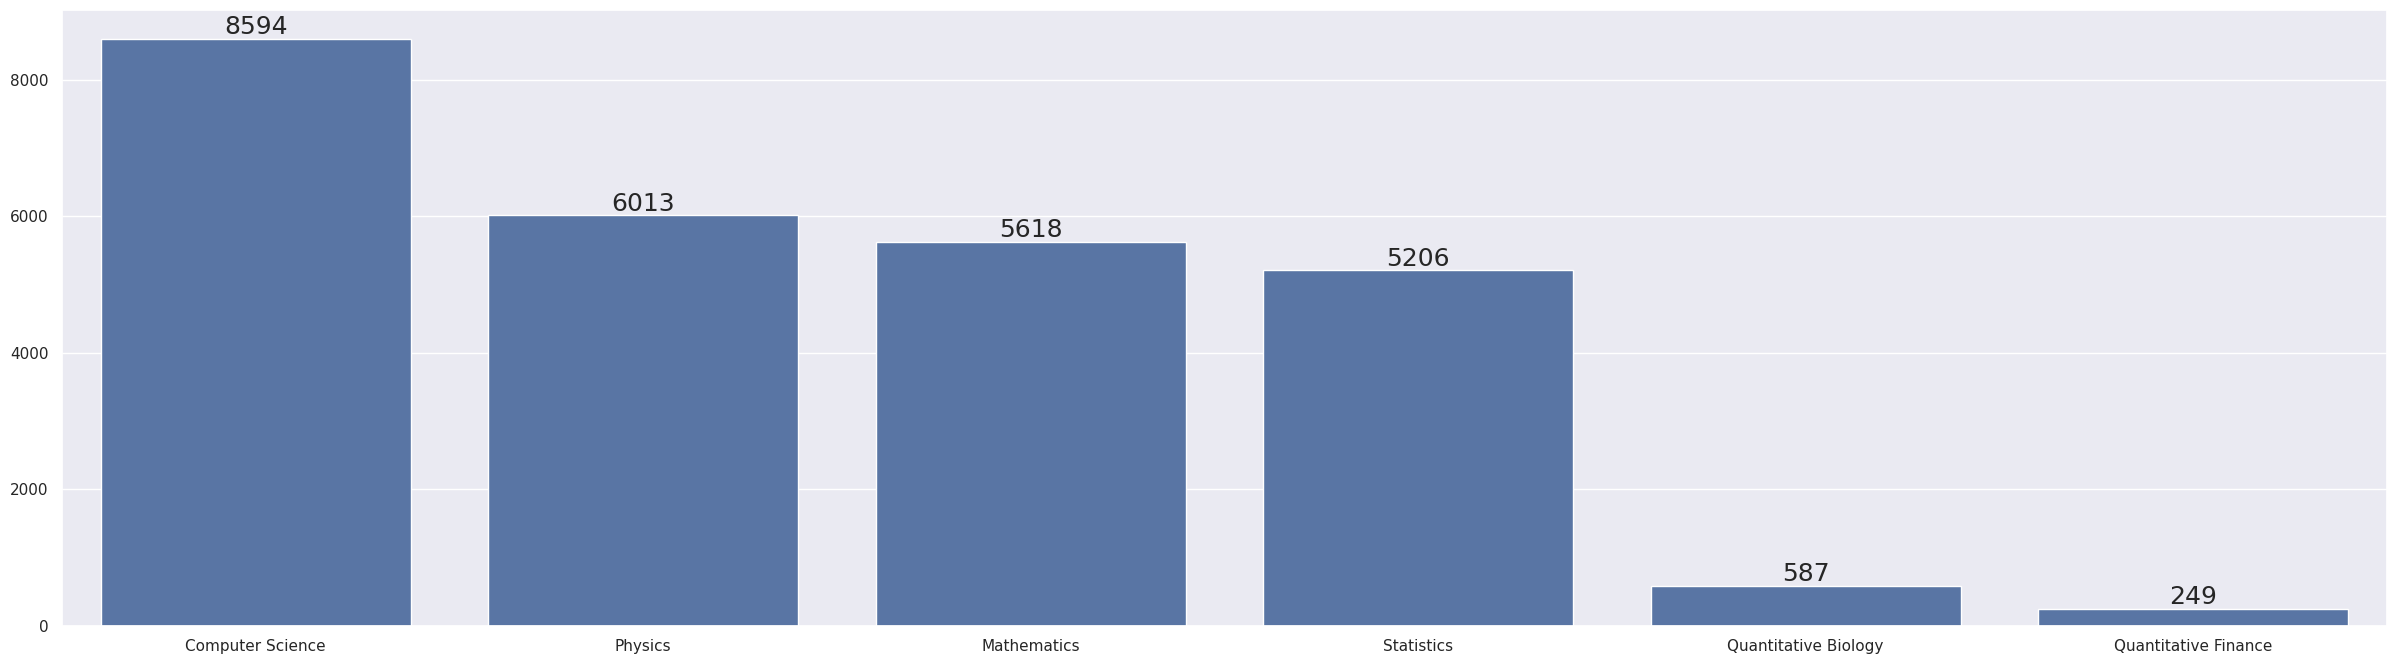

In [ ]:
categories = list(df.iloc[:,3:].columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(30,8))

ax = sns.barplot(x=categories, y=df.iloc[:, 3:].sum().values)

rects = ax.patches

labels = df.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=18)
plt.show()


In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts
rowSums

0        1
1        1
2        1
3        1
4        2
        ..
20967    2
20968    1
20969    1
20970    2
20971    2
Length: 20972, dtype: int64

In [ ]:
multiLabel_counts

1    15928
2     4793
3      251
dtype: int64

In [ ]:
# df.iloc[:,3:]

In [ ]:
labels = multiLabel_counts.values
labels

array([15928,  4793,   251])

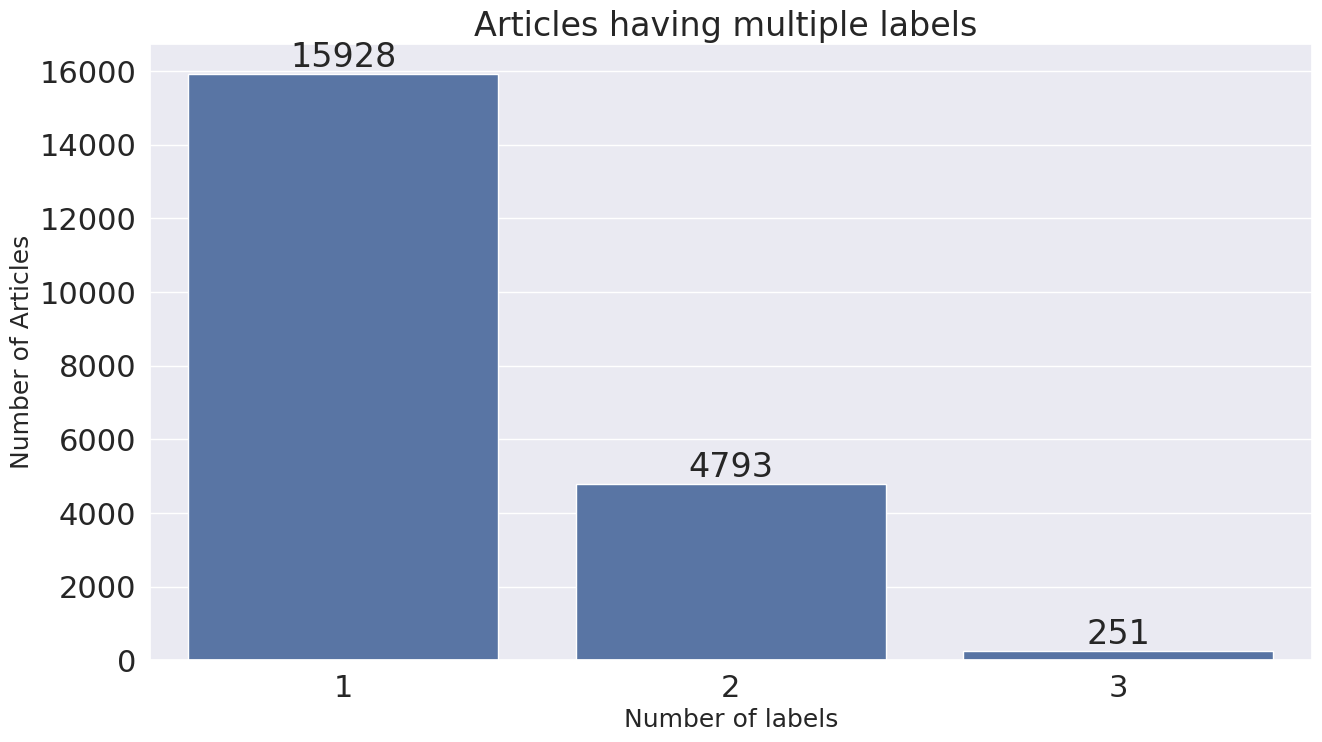

In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

# multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
plt.title("Articles having multiple labels ")
plt.ylabel('Number of Articles', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)#adding the text labels

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

In [ ]:
df.columns.values

array(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics',
       'Mathematics', 'Statistics', 'Quantitative Biology',
       'Quantitative Finance'], dtype=object)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

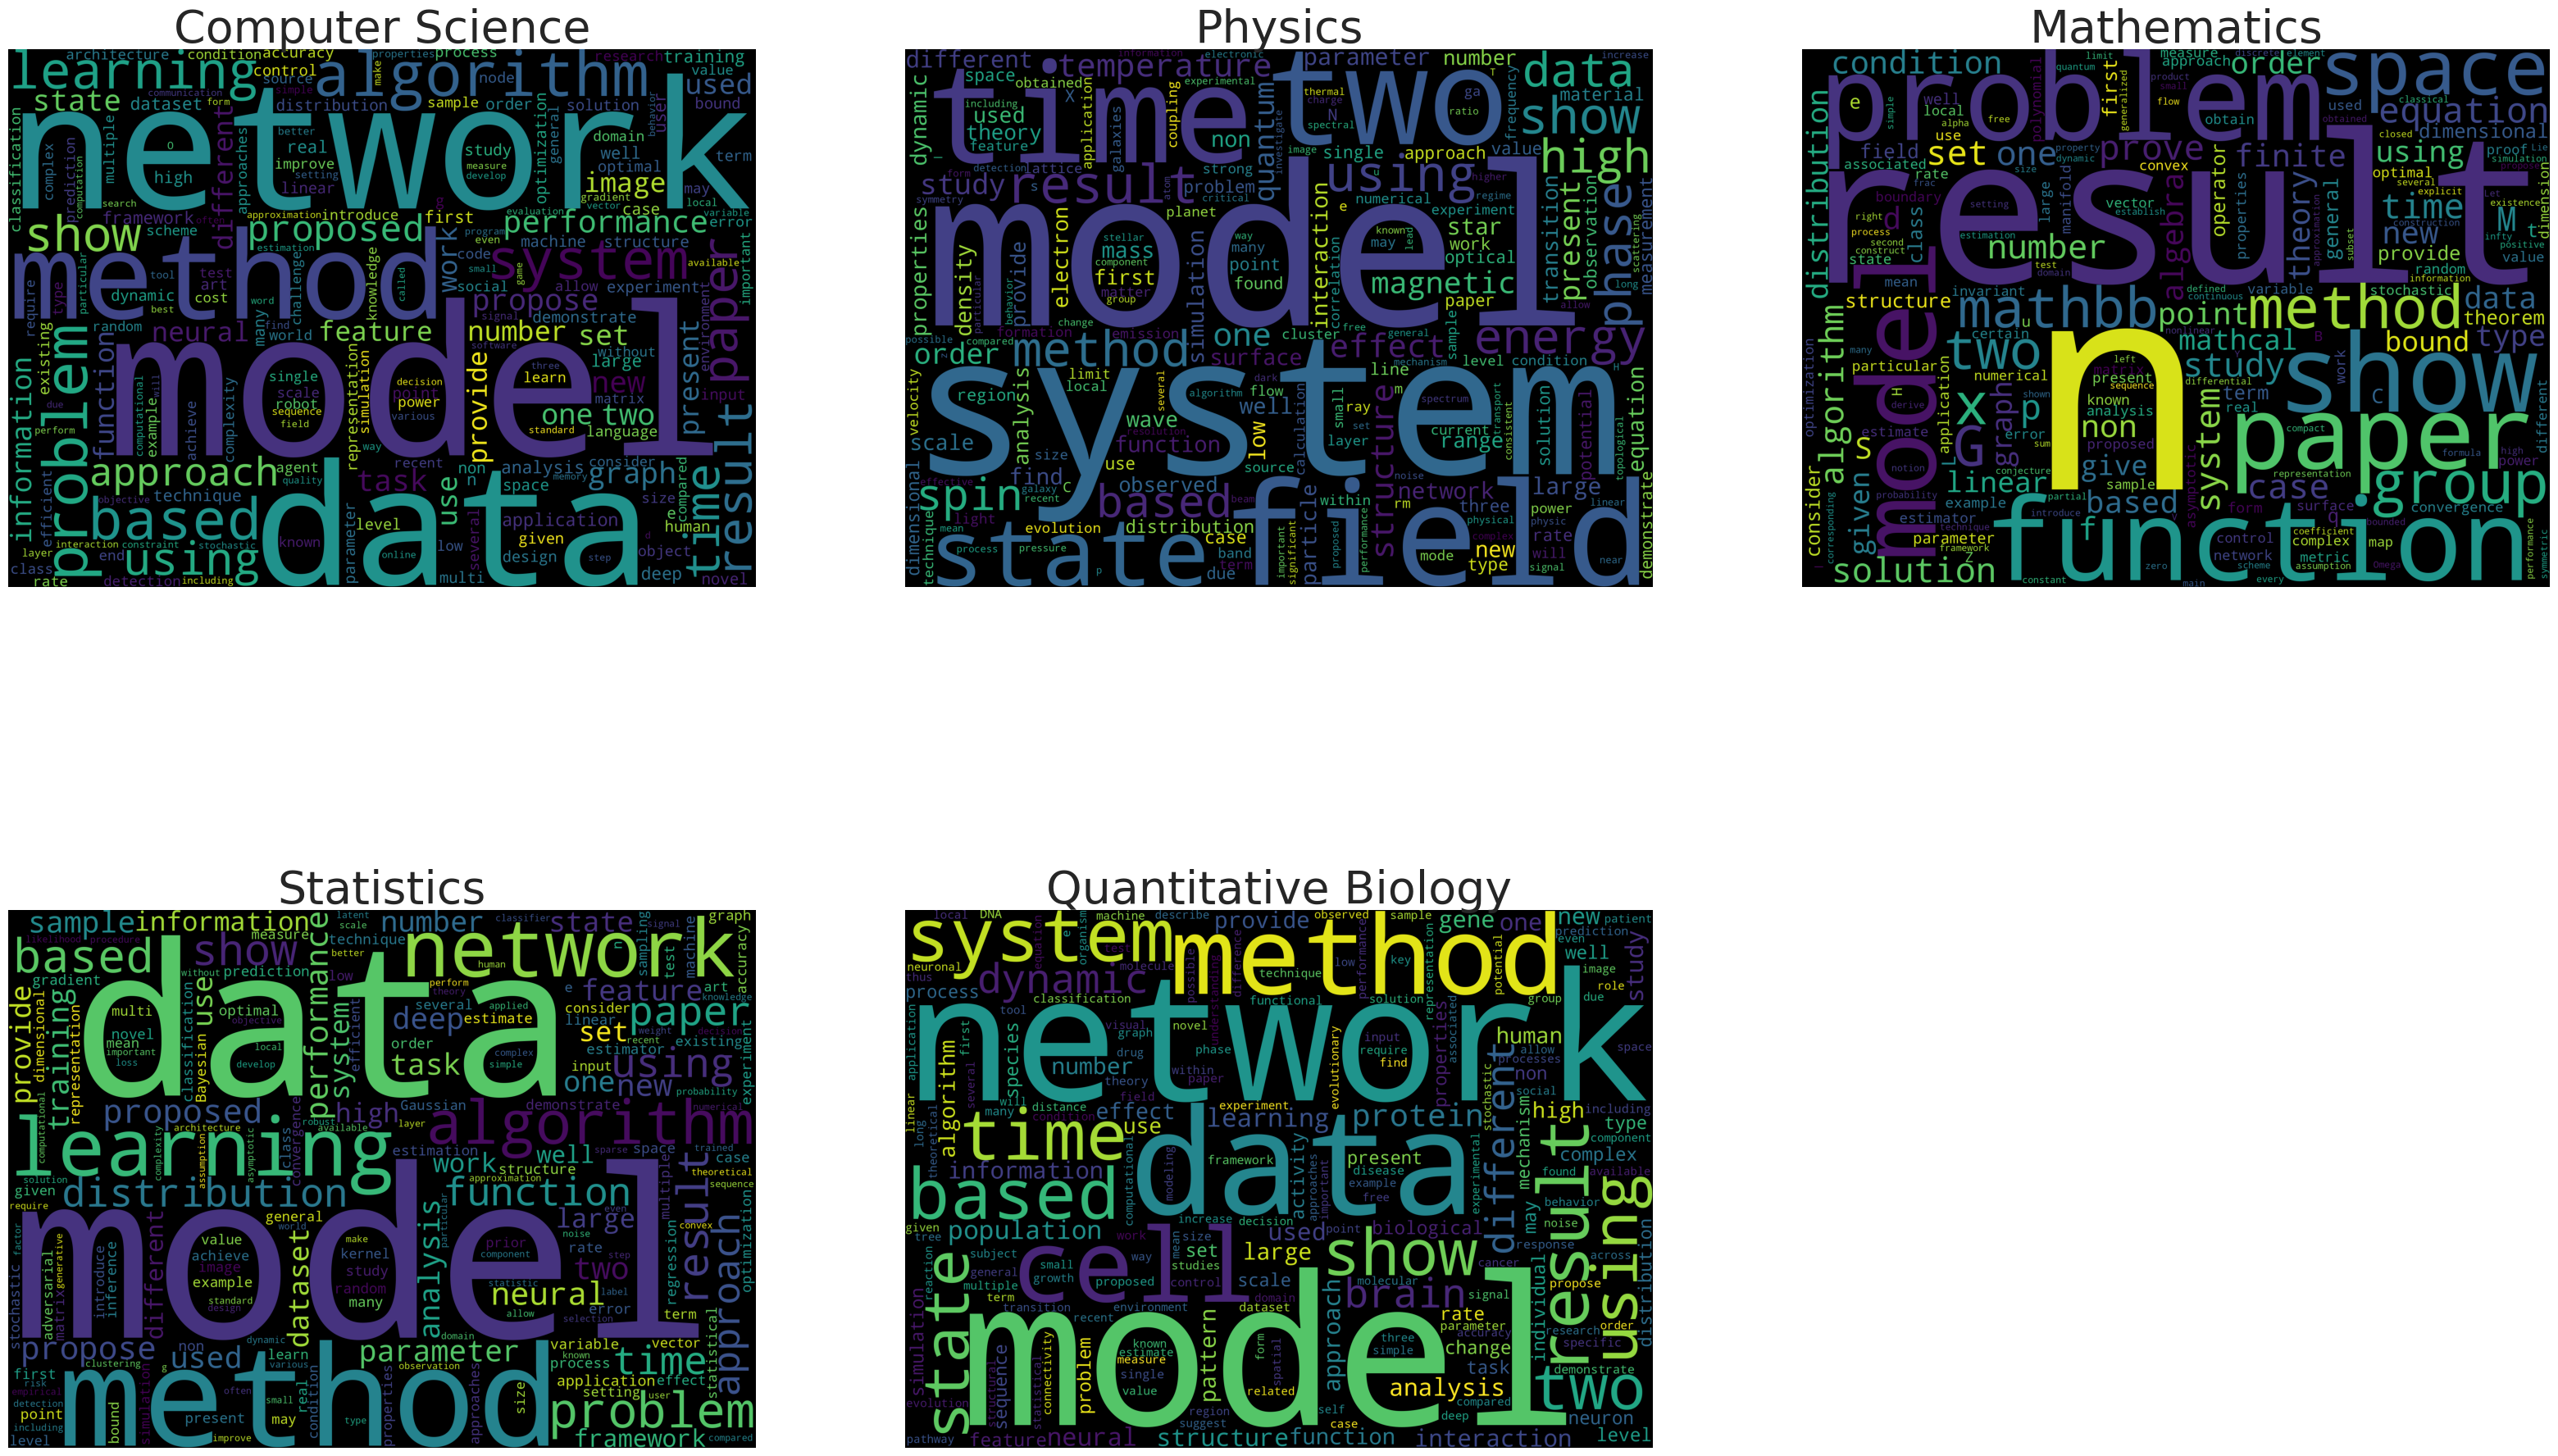

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Computer Science
subset = df[df['Computer Science']==1]
text = subset.ABSTRACT.values
cloud_CS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Computer Science",fontsize=40)
plt.imshow(cloud_CS)


subset = df[df['Physics']==1]
text = subset.ABSTRACT.values
cloud_Physics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Physics",fontsize=40)
plt.imshow(cloud_Physics)


# Mathematics', 'Statistics', 'Quantitative Biology'

subset = df[df['Mathematics']==1]
text = subset.ABSTRACT.values
cloud_Mathematics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Mathematics",fontsize=40)
plt.imshow(cloud_Mathematics)


subset = df[df['Statistics']==1]
text = subset.ABSTRACT.values
cloud_Statistics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Statistics",fontsize=40)
plt.imshow(cloud_Statistics)

subset = df[df['Quantitative Biology']==1]
text = subset.ABSTRACT.values
cloud_Quantitative_Biology = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Quantitative Biology",fontsize=40)
plt.imshow(cloud_Quantitative_Biology)



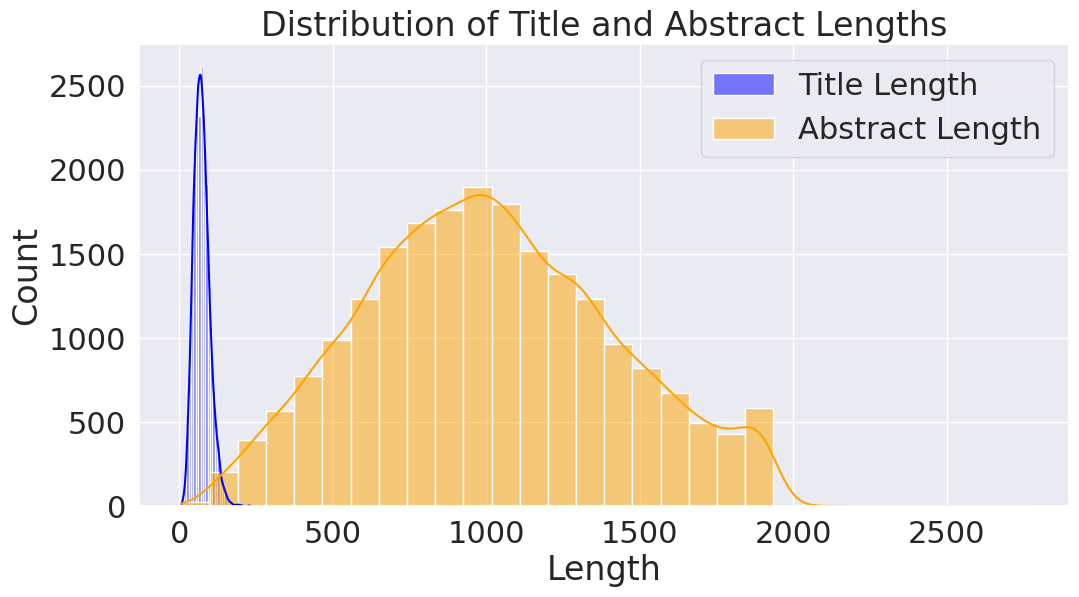

In [ ]:
# Distribution of classes in target variables
# class_columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
# class_distribution = df[class_columns].sum()

# plt.figure(figsize=(10, 6))
# sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
# plt.title("Distribution of Classes")
# plt.xlabel("Classes")
# plt.ylabel("Count")
# plt.show()

# Distribution of word lengths in 'TITLE' and 'ABSTRACT'
df['Title_Length'] = df['TITLE'].apply(len)
df['Abstract_Length'] = df['ABSTRACT'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['Title_Length'], bins=30, kde=True, color='blue', label='Title Length')
sns.histplot(df['Abstract_Length'], bins=30, kde=True, color='orange', label='Abstract Length')
plt.title("Distribution of Title and Abstract Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.legend()
plt.show()

# # Correlation heatmap
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()


##Data Pre-Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Cleaning and standardizing data

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


In [ ]:
df.head(10)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   
5   6  On maximizing the fundamental frequency of the...   
6   7  On the rotation period and shape of the hyperb...   
7   8  Adverse effects of polymer coating on heat tra...   
8   9  SPH calculations of Mars-scale collisions: the...   
9  10  $\mathcal{R}_{0}$ fails to predict the outbrea...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   
5    Let $\Omega \subset \mathbb{R}^n$ be a bound...                 0   
6    We observed the newly discovered hyperbolic ...                 0   
7    The ability of metallic nanoparticles to sup...                 0   
8    We model large-scale ($\approx$2000km) impac...                 0   
9    Time varying susceptibility of host at indiv...                 0   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   
5        0            1           0                     0   
6        1            0           0                     0   
7        1            0           0                     0   
8        1            0           0                     0   
9        0            0           0                     1   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

In [ ]:
df['TITLE'] = df['TITLE'].str.lower()
df['TITLE'] = df['TITLE'].apply(cleanHtml)
df['TITLE'] = df['TITLE'].apply(cleanPunc)
df['TITLE'] = df['TITLE'].apply(keepAlpha)
df.head()

ID                                              TITLE  \
0   1        reconstructing subject specific effect maps   
1   2                 rotation invariance neural network   
2   3  spherical polyharmonics and poisson kernels fo...   
3   4  a finite element approximation for the stochas...   
4   5  comparative study of discrete wavelet transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
df['ABSTRACT'] = df['ABSTRACT'].str.lower()
df['ABSTRACT'] = df['ABSTRACT'].apply(cleanHtml)
df['ABSTRACT'] = df['ABSTRACT'].apply(cleanPunc)
df['ABSTRACT'] = df['ABSTRACT'].apply(keepAlpha)
df.head()

ID                                              TITLE  \
0   1        reconstructing subject specific effect maps   
1   2                 rotation invariance neural network   
2   3  spherical polyharmonics and poisson kernels fo...   
3   4  a finite element approximation for the stochas...   
4   5  comparative study of discrete wavelet transfor...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subject specific infer...                 1   
1  rotation invariance and translation invariance...                 1   
2  we introduce and develop the notion of spheric...                 0   
3  the stochastic landau lifshitz gilbert llg equ...                 0   
4  fourier transform infra red ftir spectra of sa...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

##Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df['TITLE'] = df['TITLE'].apply(removeStopWords)
df['ABSTRACT'] = df['ABSTRACT'].apply(removeStopWords)

df.head()


ID                                              TITLE  \
0   1        reconstructing subject specific effect maps   
1   2                 rotation invariance neural network   
2   3  spherical polyharmonics  poisson kernels  poly...   
3   4   finite element approximation   stochastic max...   
4   5  comparative study  discrete wavelet transforms...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subject specific infer...                 1   
1  rotation invariance  translation invariance  g...                 1   
2   introduce  develop  notion  spherical polyhar...                 0   
3   stochastic landau lifshitz gilbert llg equati...                 0   
4  fourier transform infra red ftir spectra  samp...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

##Stemming

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['TITLE'] = df['TITLE'].apply(stemming)
df['ABSTRACT'] = df['ABSTRACT'].apply(stemming)
df.head()

ID                                              TITLE  \
0   1              reconstruct subject specif effect map   
1   2                        rotat invari neural network   
2   3  spheric polyharmon poisson kernel polyharmon f...   
3   4  finit element approxim stochast maxwel landau ...   
4   5  compar studi discret wavelet transform wavelet...   

                                            ABSTRACT  Computer Science  \
0  predict model allow subject specif infer analy...                 1   
1  rotat invari translat invari great valu imag r...                 1   
2  introduc develop notion spheric polyharmon nat...                 0   
3  stochast landau lifshitz gilbert llg equat cou...                 0   
4  fourier transform infra red ftir spectra sampl...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
df.head(1)

ID                                  TITLE  \
0   1  reconstruct subject specif effect map   

                                            ABSTRACT  Computer Science  \
0  predict model allow subject specif infer analy...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   

   Quantitative Finance  
0                     0

In [ ]:
new_df = df

In [ ]:
####

#Feature Engineering

###Adding new features

In [ ]:
df['Title_Length'] = df['TITLE'].apply(len)
df['Abstract_Length'] = df['ABSTRACT'].apply(len)
df['Title_Word_Count'] = df['TITLE'].apply(lambda x: len(x.split()))
df['Abstract_Word_Count'] = df['ABSTRACT'].apply(lambda x: len(x.split()))
df['Average_Word_Length_Title'] = df['TITLE'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['Average_Word_Length_Abstract'] = df['ABSTRACT'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['Contains_Numerals_Title'] = df['TITLE'].apply(lambda x: any(char.isdigit() for char in x))

In [ ]:
df.head(2)

ID                                        TITLE  \
0   1  Reconstructing Subject-Specific Effect Maps   
1   2           Rotation Invariance Neural Network   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   

   Quantitative Finance  Title_Length  Abstract_Length  Title_Word_Count  \
0                     0            43             1912                 4   
1                     0            34              513                 4   

   Abstract_Word_Count  Average_Word_Length_Title  \
0                  265                      10.00   
1                   76                       7.75   

   Average_Word_Length_Abstract  Contains_Numerals_Title  
0                      6.207547                    False  
1                      5.723684                    False

In [ ]:
# import pandas as pd

# # Sample DataFrames
# df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
# df2 = pd.DataFrame({'ID': [1, 2, 4], 'Age': [25, 30, 22]})

# # Merge based on the 'ID' column
# merged_df = pd.merge(df1, df2, on='ID', how='inner')

# # Display the merged DataFrame
# print(merged_df)


   ID   Name  Age
0   1  Alice   25
1   2    Bob   30


In [ ]:
df

ID                                              TITLE  \
0      1              reconstruct subject specif effect map   
1      2                        rotat invari neural network   
2      3  spheric polyharmon poisson kernel polyharmon f...   
3      4  finit element approxim stochast maxwel landau ...   
4      5  compar studi discret wavelet transform wavelet...   
..   ...                                                ...   
946  947                     macdonald refin topolog vertex   
947  948  bias voltag effect tunnel magnetoresist fe mga...   
948  949  listen face infer facial action unit audio cha...   
949  950  ice cake easi quick post learnig method tri de...   
950  951   minim effort back propag convolut neural network   

                                              ABSTRACT  Computer Science  \
0    predict model allow subject specif infer analy...                 1   
1    rotat invari translat invari great valu imag r...                 1   
2    introduc develop notion spheric polyharmon nat...                 0   
3    stochast landau lifshitz gilbert llg equat cou...                 0   
4    fourier transform infra red ftir spectra sampl...                 1   
..                                                 ...               ...   
946  consid refin topolog vertex iqbal et al functi...                 0   
947  investig bias voltag effect spin depend transp...                 0   
948  extens effort devot recogn facial action unit ...                 1   
949  found easi quick post learn method name ice ca...                 0   
950  tradit neural network consum signific amount c...                 1   

     Physics  Mathematics  Statistics  Quantitative Biology  \
0          0            0           0                     0   
1          0            0           0                     0   
2          0            1           0                     0   
3          0            1           0                     0   
4          0            0           1                     0   
..       ...          ...         ...                   ...   
946        0            1           0                     0   
947        1            0           0                     0   
948        0            0           0                     0   
949        0            0           1                     0   
950        0            0           1                     0   

     Quantitative Finance  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
946                     0  
947                     0  
948                     0  
949                     0  
950                     0  

[951 rows x 9 columns]

In [ ]:
new_df = df[['ID','TITLE','ABSTRACT','Title_Length','Abstract_Length','Title_Word_Count','Abstract_Word_Count','Average_Word_Length_Title','Average_Word_Length_Abstract','Contains_Numerals_Title']].copy()

In [ ]:
new_df

ID                                              TITLE  \
0      1              reconstruct subject specif effect map   
1      2                        rotat invari neural network   
2      3  spheric polyharmon poisson kernel polyharmon f...   
3      4  finit element approxim stochast maxwel landau ...   
4      5  compar studi discret wavelet transform wavelet...   
..   ...                                                ...   
946  947                     macdonald refin topolog vertex   
947  948  bias voltag effect tunnel magnetoresist fe mga...   
948  949  listen face infer facial action unit audio cha...   
949  950  ice cake easi quick post learnig method tri de...   
950  951   minim effort back propag convolut neural network   

                                              ABSTRACT  Title_Length  \
0    predict model allow subject specif infer analy...            37   
1    rotat invari translat invari great valu imag r...            27   
2    introduc develop notion spheric polyharmon nat...            53   
3    stochast landau lifshitz gilbert llg equat cou...            69   
4    fourier transform infra red ftir spectra sampl...           109   
..                                                 ...           ...   
946  consid refin topolog vertex iqbal et al functi...            30   
947  investig bias voltag effect spin depend transp...            91   
948  extens effort devot recogn facial action unit ...            50   
949  found easi quick post learn method name ice ca...            54   
950  tradit neural network consum signific amount c...            48   

     Abstract_Length  Title_Word_Count  Abstract_Word_Count  \
0               1258                 5                  189   
1                314                 4                   47   
2                430                 6                   58   
3                484                 9                   70   
4                578                15                   85   
..               ...               ...                  ...   
946              395                 4                   67   
947              670                15                  117   
948              925                 8                  136   
949              130                10                   21   
950              497                 7                   75   

     Average_Word_Length_Title  Average_Word_Length_Abstract  \
0                     6.600000                      5.661376   
1                     6.000000                      5.702128   
2                     8.000000                      6.431034   
3                     6.777778                      5.928571   
4                     6.333333                      5.811765   
..                         ...                           ...   
946                   6.750000                      4.910448   
947                   5.133333                      4.735043   
948                   5.375000                      5.808824   
949                   4.500000                      5.238095   
950                   6.000000                      5.640000   

     Contains_Numerals_Title  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  
..                       ...  
946                    False  
947                    False  
948                    False  
949                    False  
950                    False  

[951 rows x 10 columns]

In [ ]:
labels = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].copy()

In [ ]:
labels


Computer Science  Physics  Mathematics  Statistics  Quantitative Biology  \
0                   1        0            0           0                     0   
1                   1        0            0           0                     0   
2                   0        0            1           0                     0   
3                   0        0            1           0                     0   
4                   1        0            0           1                     0   
..                ...      ...          ...         ...                   ...   
946                 0        0            1           0                     0   
947                 0        1            0           0                     0   
948                 1        0            0           0                     0   
949                 0        0            0           1                     0   
950                 1        0            0           1                     0   

     Quantitative Finance  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
946                     0  
947                     0  
948                     0  
949                     0  
950                     0  

[951 rows x 6 columns]

In [ ]:
correlations = pd.concat([new_df, labels], axis=1).corr(method='pearson')

# Display the correlation matrix
print(correlations)

In [ ]:
new_df

ID                                              TITLE  \
0      1              reconstruct subject specif effect map   
1      2                        rotat invari neural network   
2      3  spheric polyharmon poisson kernel polyharmon f...   
3      4  finit element approxim stochast maxwel landau ...   
4      5  compar studi discret wavelet transform wavelet...   
..   ...                                                ...   
946  947                     macdonald refin topolog vertex   
947  948  bias voltag effect tunnel magnetoresist fe mga...   
948  949  listen face infer facial action unit audio cha...   
949  950  ice cake easi quick post learnig method tri de...   
950  951   minim effort back propag convolut neural network   

                                              ABSTRACT  Title_Length  \
0    predict model allow subject specif infer analy...            37   
1    rotat invari translat invari great valu imag r...            27   
2    introduc develop notion spheric polyharmon nat...            53   
3    stochast landau lifshitz gilbert llg equat cou...            69   
4    fourier transform infra red ftir spectra sampl...           109   
..                                                 ...           ...   
946  consid refin topolog vertex iqbal et al functi...            30   
947  investig bias voltag effect spin depend transp...            91   
948  extens effort devot recogn facial action unit ...            50   
949  found easi quick post learn method name ice ca...            54   
950  tradit neural network consum signific amount c...            48   

     Abstract_Length  Title_Word_Count  Abstract_Word_Count  \
0               1258                 5                  189   
1                314                 4                   47   
2                430                 6                   58   
3                484                 9                   70   
4                578                15                   85   
..               ...               ...                  ...   
946              395                 4                   67   
947              670                15                  117   
948              925                 8                  136   
949              130                10                   21   
950              497                 7                   75   

     Average_Word_Length_Title  Average_Word_Length_Abstract  \
0                     6.600000                      5.661376   
1                     6.000000                      5.702128   
2                     8.000000                      6.431034   
3                     6.777778                      5.928571   
4                     6.333333                      5.811765   
..                         ...                           ...   
946                   6.750000                      4.910448   
947                   5.133333                      4.735043   
948                   5.375000                      5.808824   
949                   4.500000                      5.238095   
950                   6.000000                      5.640000   

     Contains_Numerals_Title  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  
..                       ...  
946                    False  
947                    False  
948                    False  
949                    False  
950                    False  

[951 rows x 10 columns]

<Axes: >

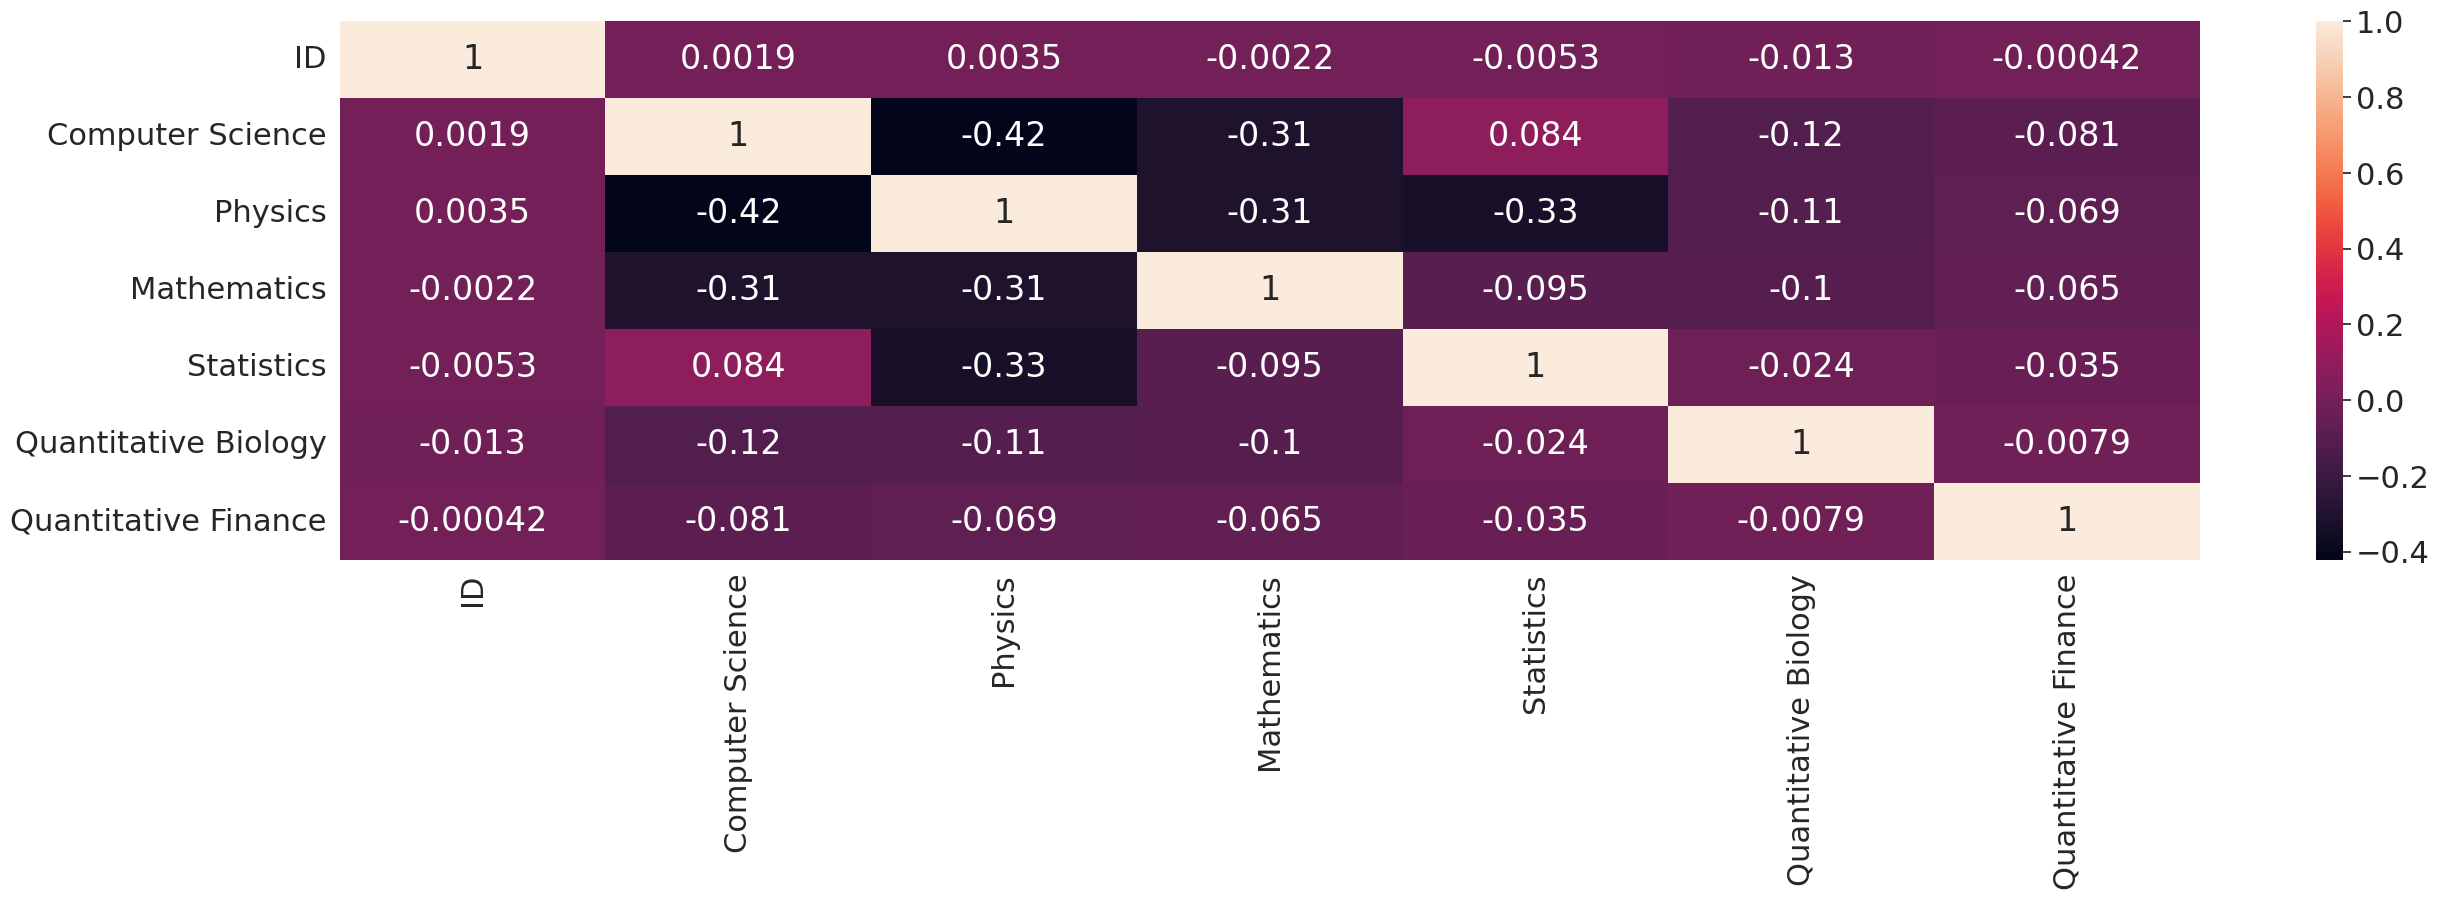

In [ ]:
plt.figure(figsize=(30, 7))
sns.heatmap(df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("pearson"), annot=True)

<Axes: >

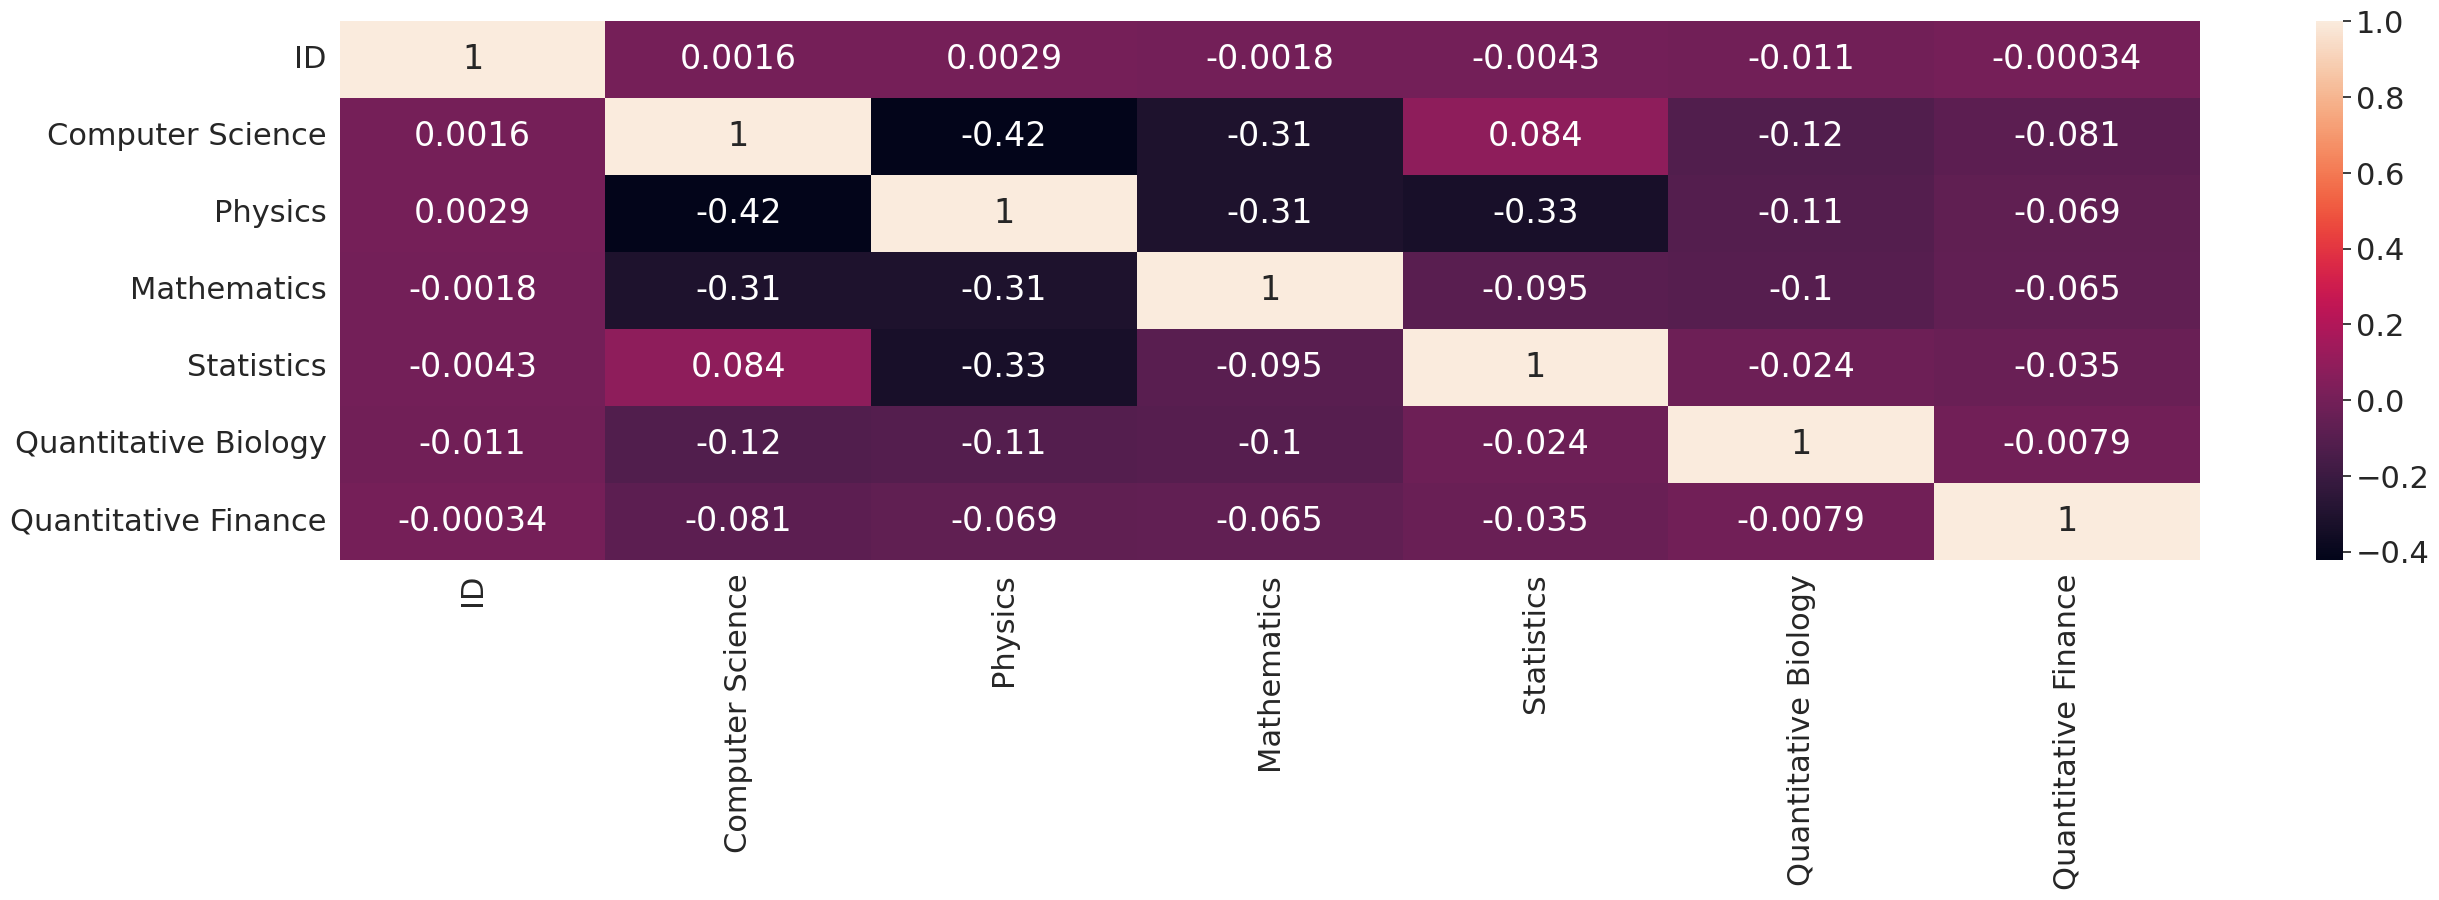

In [ ]:
plt.figure(figsize=(30, 7))
sns.heatmap(df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("kendall"), annot=True)

<Axes: >

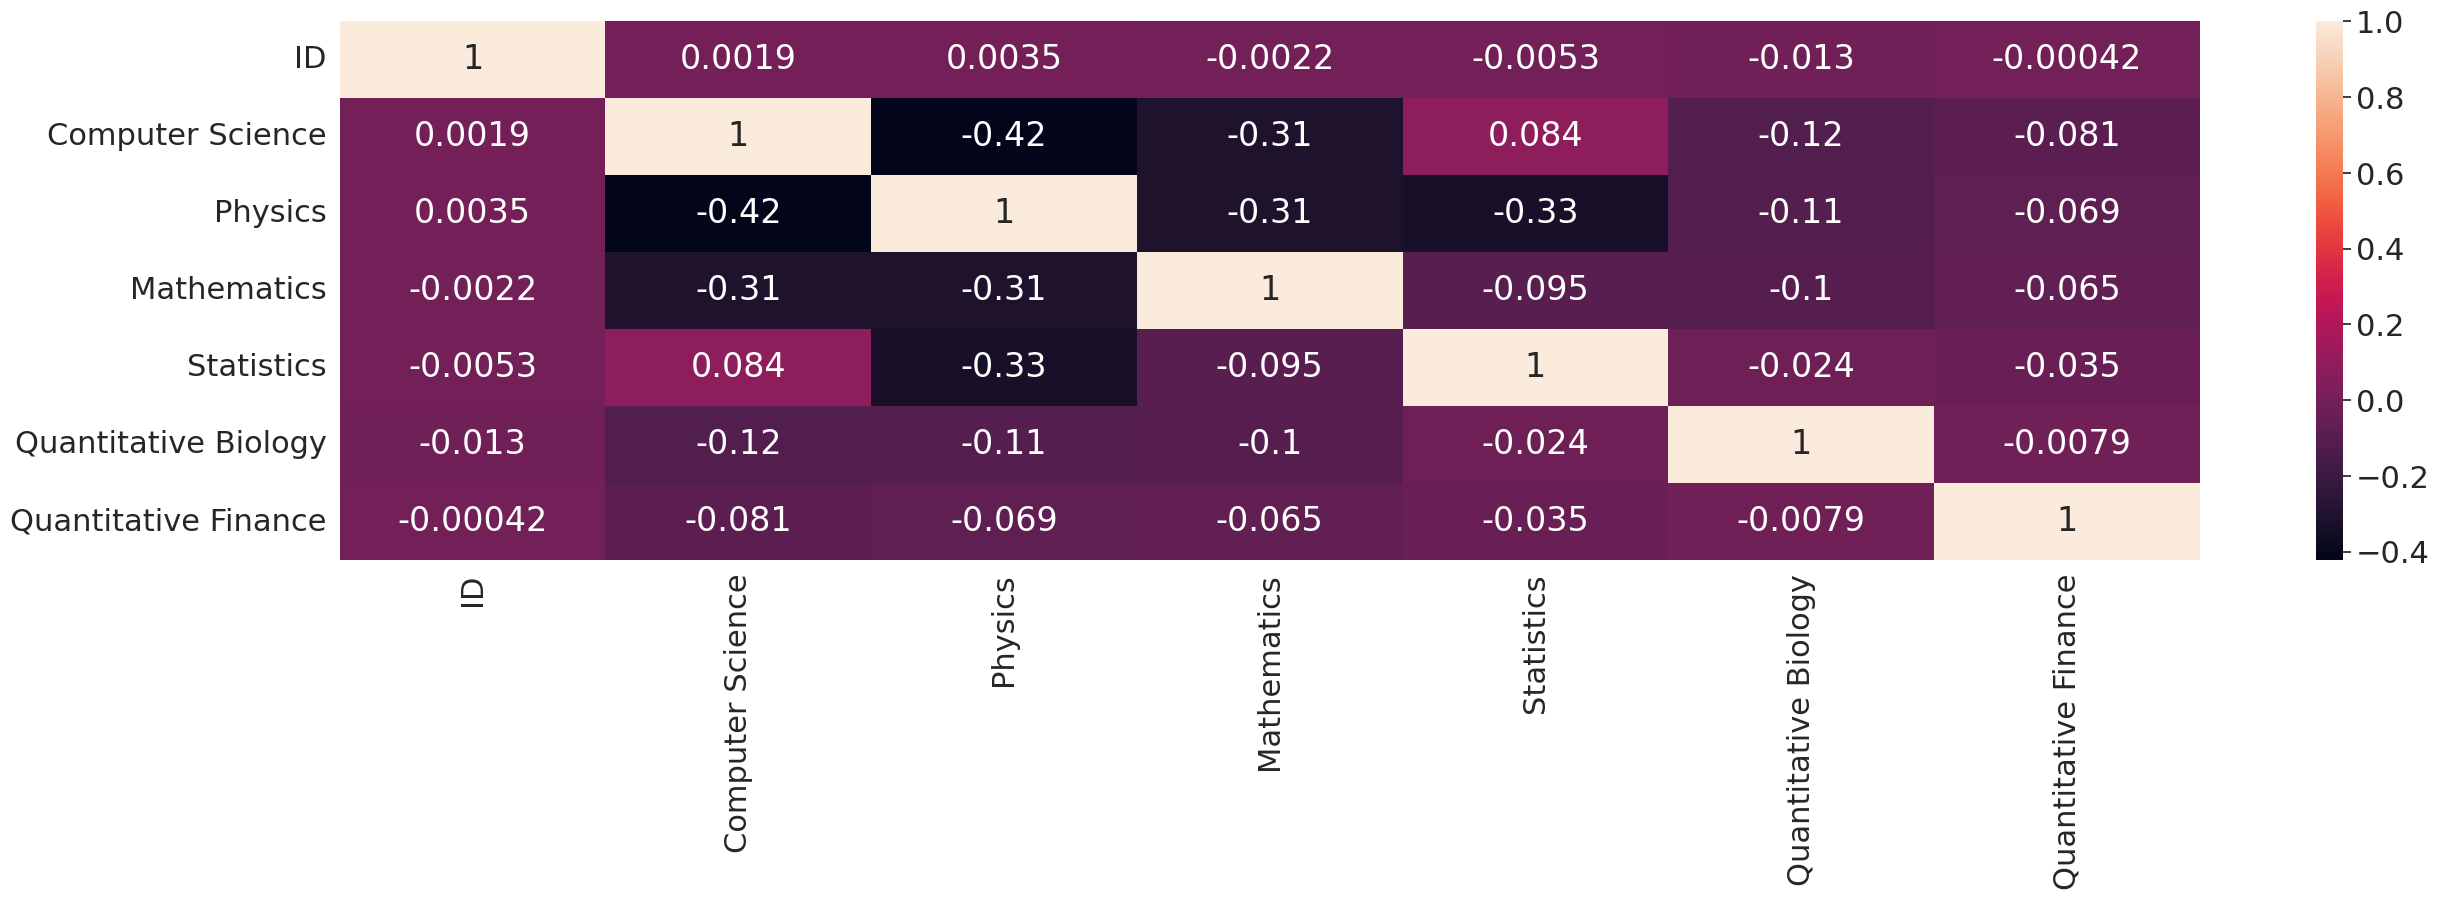

In [ ]:
plt.figure(figsize=(30, 7))
sns.heatmap(df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("spearman"), annot=True)

In [ ]:

kendallcorr = df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("kendall")
pearsoncorr = df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("pearson")
spearmancorr = df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("spearman")

In [ ]:
kendallcorrSet_CS = set(kendallcorr[kendallcorr['Computer Science'] >= 0.10].index.to_list())
kendallcorrSet_physics = set(kendallcorr[kendallcorr >= 0.10].index.to_list())
kendallcorrSet_maths = set(kendallcorr[kendallcorr >= 0.10].index.to_list())
kendallcorrSet_statistics =set(kendallcorr[kendallcorr['Statistics'] >= 0.10].index.to_list())
kendallcorrSet_QB = set(kendallcorr[kendallcorr['Quantitative Biology'] >= 0.10].index.to_list())
kendallcorrSet_QF = set(kendallcorr[kendallcorr['Quantitative Finance']>= 0.10].index.to_list())

In [ ]:
pearsoncorrSet_CS =         set(pearsoncorr[pearsoncorr['Computer Science'] >= 0.10].index.to_list())
pearsoncorrSet_physics =    set(pearsoncorr[pearsoncorr >= 0.10].index.to_list())
pearsoncorrSet_maths =      set(pearsoncorr[pearsoncorr >= 0.10].index.to_list())
pearsoncorrSet_statistics=  set(pearsoncorr[pearsoncorr['Statistics'] >= 0.10].index.to_list())
pearsoncorrSet_QB =         set(pearsoncorr[pearsoncorr['Quantitative Biology'] >= 0.10].index.to_list())
pearsoncorrSet_QF =         set(pearsoncorr[pearsoncorr['Quantitative Finance']>= 0.10].index.to_list())

In [ ]:
spearmancorrSet_CS =         set(spearmancorr[spearmancorr['Computer Science'] >= 0.10].index.to_list())
spearmancorrSet_physics =    set(spearmancorr[spearmancorr >= 0.10].index.to_list())
spearmancorrSet_maths =      set(spearmancorr[spearmancorr >= 0.10].index.to_list())
spearmancorrSet_statistics=  set(spearmancorr[spearmancorr['Statistics'] >= 0.10].index.to_list())
spearmancorrSet_QB =         set(spearmancorr[spearmancorr['Quantitative Biology'] >= 0.10].index.to_list())
spearmancorrSet_QF =         set(spearmancorr[spearmancorr['Quantitative Finance']>= 0.10].index.to_list())

In [ ]:
interSets = set.union( spearmancorrSet_CS,
                               spearmancorrSet_physics,
                               spearmancorrSet_maths,
                               spearmancorrSet_statistics,
                               spearmancorrSet_QB,
                              spearmancorrSet_QF,

                              pearsoncorrSet_CS,
                              pearsoncorrSet_physics,
                              pearsoncorrSet_maths,
                              pearsoncorrSet_statistics,
                              pearsoncorrSet_QB,
                              pearsoncorrSet_QF,

                              kendallcorrSet_CS,
                              kendallcorrSet_physics,
                              kendallcorrSet_maths,
                              kendallcorrSet_statistics,
                              kendallcorrSet_QB,
                              kendallcorrSet_QF
                              )

In [ ]:
interSets
# kendallcorrSet
# df.columns

{'Abstract_Length',
 'Abstract_Word_Count',
 'Computer Science',
 'ID',
 'Mathematics',
 'Physics',
 'Quantitative Biology',
 'Quantitative Finance',
 'Statistics',
 'Title_Length',
 'Title_Word_Count'}

In [ ]:
new_df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Title_Length', 'Abstract_Length',
       'Title_Word_Count', 'Abstract_Word_Count', 'Average_Word_Length_Title',
       'Average_Word_Length_Abstract', 'Contains_Numerals_Title'],
      dtype='object')

In [ ]:
del new_df['Average_Word_Length_Title']
del new_df['Contains_Numerals_Title']
del new_df['Average_Word_Length_Abstract']
del new_df['ID']

In [ ]:
new_df['title_abstract'] = new_df[['TITLE', 'ABSTRACT']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
new_df['title_abstract']

0      reconstruct subject specif effect map predict ...
1      rotat invari neural network rotat invari trans...
2      spheric polyharmon poisson kernel polyharmon f...
3      finit element approxim stochast maxwel landau ...
4      compar studi discret wavelet transform wavelet...
                             ...                        
946    macdonald refin topolog vertex consid refin to...
947    bias voltag effect tunnel magnetoresist fe mga...
948    listen face infer facial action unit audio cha...
949    ice cake easi quick post learnig method tri de...
950    minim effort back propag convolut neural netwo...
Name: title_abstract, Length: 951, dtype: object

In [ ]:
dummy_df = new_df.copy()
del dummy_df['TITLE']
del dummy_df['ABSTRACT']

dummy_df

Title_Length  Abstract_Length  Title_Word_Count  Abstract_Word_Count  \
0              37             1258                 5                  189   
1              27              314                 4                   47   
2              53              430                 6                   58   
3              69              484                 9                   70   
4             109              578                15                   85   
..            ...              ...               ...                  ...   
946            30              395                 4                   67   
947            91              670                15                  117   
948            50              925                 8                  136   
949            54              130                10                   21   
950            48              497                 7                   75   

                                        title_abstract  
0    reconstruct subject specif effect map predict ...  
1    rotat invari neural network rotat invari trans...  
2    spheric polyharmon poisson kernel polyharmon f...  
3    finit element approxim stochast maxwel landau ...  
4    compar studi discret wavelet transform wavelet...  
..                                                 ...  
946  macdonald refin topolog vertex consid refin to...  
947  bias voltag effect tunnel magnetoresist fe mga...  
948  listen face infer facial action unit audio cha...  
949  ice cake easi quick post learnig method tri de...  
950  minim effort back propag convolut neural netwo...  

[951 rows x 5 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# labels = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].copy()

In [ ]:
# del df['Computer Science']
# del df['Physics']
# del df['Mathematics']
# del df['Statistics']
# del df['Quantitative Biology']
# del df['Quantitative Finance']


In [ ]:
# df['title_abstract'] = df[['TITLE', 'ABSTRACT']].apply(lambda x: ' '.join(x), axis=1)
# del df['TITLE']
# del df['ABSTRACT']

In [ ]:
from sklearn.model_selection import train_test_split

# train, test = train_test_split(dummy_df, random_state=42, test_size=0.30, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(dummy_df, labels, test_size = 0.35, random_state = 42, shuffle=True)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))

(618, 2) 618 (333, 2) 333


In [ ]:
# from sklearn.model_selection import train_test_split


# x_train, x_test, y_train, y_test = train_test_split(dummy_df, labels, test_size = 0.35, random_state = 42, shuffle=True)
# print(x_train.shape,len(y_train),x_test.shape,len(y_test))

# print(x_train.shape)
# print(test.shape)

In [ ]:
x_test

ID                                              TITLE  \
199  200  edg partial invers problem sturm liouvill oper...   
420  421  flow along arch filament observ gris fast spec...   
694  695  parallel orbit updat base plane wave basi meth...   
750  751  analyt heat rate neutron star merger ejecta de...   
507  508                             dynam shrinkag process   
..   ...                                                ...   
193  194          dagger sequenti algorithm fdr control dag   
531  532  pariti forbidden transit impact optic absorpt ...   
728  729  reconstruct global field dynam abelian galoi g...   
169  170                          marcel riesz n rlund mean   
436  437        citi scale road audit system use deep learn   

                                              ABSTRACT  
199  boundari valu problem sturm liouvill oper pote...  
420  new generat solar instrument provid improv spe...  
694  motiv recent propos parallel orbit updat appro...  
750  macronova kilonova aris binari neutron star me...  
507  propos novel class dynam shrinkag process baye...  
..                                                 ...  
193  propos linear time singl pass top algorithm mu...  
531  use densiti function theori calcul analyz opti...  
728  studi dynam system induc artin reciproc map gl...  
169  note necessari suffici condit establish marcel...  
436  road network citi massiv critic compon mobil f...  

[333 rows x 3 columns]

In [ ]:


train_text = x_train['title_abstract']
test_text = x_test['title_abstract']


In [ ]:
test_text

199    edg partial invers problem sturm liouvill oper...
420    flow along arch filament observ gris fast spec...
694    parallel orbit updat base plane wave basi meth...
750    analyt heat rate neutron star merger ejecta de...
507    dynam shrinkag process propos novel class dyna...
                             ...                        
193    dagger sequenti algorithm fdr control dag prop...
531    pariti forbidden transit impact optic absorpt ...
728    reconstruct global field dynam abelian galoi g...
169    marcel riesz n rlund mean note necessari suffi...
436    citi scale road audit system use deep learn ro...
Name: title_abstract, Length: 333, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [ ]:
x_train = vectorizer.transform(train_text)
x_train

<618x61309 sparse matrix of type '<class 'numpy.float64'>'
	with 42943 stored elements in Compressed Sparse Row format>

In [ ]:
x_test = vectorizer.transform(test_text)
x_test

<333x61309 sparse matrix of type '<class 'numpy.float64'>'
	with 80663 stored elements in Compressed Sparse Row format>

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(result_df, labels, test_size = 0.35, random_state = 42)
# print(x_train.shape,len(y_train),x_test.shape,len(y_test))
# import sklearn.metrics as metrics
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()
# model.fit(x_train,y_train)
# rfy_pred = model.predict(x_test)
# acc = metrics.accuracy_score(y_test, rfy_pred)
# print(acc)
# print(f1_score(y_test, rfy_pred, average='macro'), 'f1')
# print(model.score(x_test,y_test))

(618, 7186) 618 (333, 7186) 333


In [7]:
# train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:


# %%time

# # Using pipeline for applying logistic regression and one vs rest classifier
# LogReg_pipeline = Pipeline([
#                 ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
#             ])

# for category in labels.columns:
#     printmd('**Processing {} comments...**'.format(category))

#     # Training logistic regression model on train data
#     LogReg_pipeline.fit(x_train, labels[category])

#     # calculating test accuracy
#     prediction = LogReg_pipeline.predict(x_test)
#     print('Test accuracy is {}'.format(accuracy_score(labels[category], prediction)))
#     print("\n")



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

0.5015015015015015
0.5015015015015015


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df

In [ ]:
# df['TEXT'] = df['TITLE'] + ' ' + df['ABSTRACT']

# # Features (X) and labels (y)
# X = df['TEXT']
# y = df.drop(['ID', 'TITLE', 'ABSTRACT', 'TEXT'], axis=1)

# # Split the data into training and testing sets with stratified sampling
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # TF-IDF vectorization
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

# # Train a Random Forest classifier with class weight balancing
# classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
# classifier.fit(X_train_tfidf, y_train)

# # Make predictions on the test set
# # y_pred = classifier.predict(X_test_tfidf)
# y_pred_prob = classifier.predict_proba(X_test_tfidf)
# y_pred_prob = np.array(y_pred_prob)
# y_pred = (y_pred_prob > threshold).astype(int)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Sample DataFrame
# ... (your data loading code here)

# Concatenate 'TITLE' and 'ABSTRACT' into a single text column
df['TEXT'] = df['TITLE'] + ' ' + df['ABSTRACT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['TEXT'], df.drop(['ID', 'TITLE', 'ABSTRACT', 'TEXT'], axis=1), test_size=0.5, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a MultiOutputClassifier with RandomForestClassifier
classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6033759298111768

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      4238
           1       0.96      0.75      0.84      3080
           2       0.90      0.65      0.75      2868
           3       0.83      0.52      0.64      2569
           4       1.00      0.00      0.01       293
           5       1.00      0.03      0.06       121

   micro avg       0.86      0.68      0.76     13169
   macro avg       0.91      0.46      0.52     13169
weighted avg       0.87      0.68      0.75     13169
 samples avg       0.77      0.73      0.73     13169



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# # Example threshold adjustment
# threshold = 0.5  # Adjust this threshold as needed
# y_pred_adjusted = (classifier.predict_proba(X_test_tfidf) >= threshold).astype(float)

# # Evaluate the model with adjusted threshold
# print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))


TypeError: '>=' not supported between instances of 'list' and 'float'